# ASSIGNMENT-1 PROGRAMMING QUESTIONS

# LOGISTIC REGRESSION

## READING THE DATA INTO PANDAS DATAFRAMES

In [559]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
train_data=pd.read_csv("C:\\Users\\Sai Kumar\\Desktop\\SEM-1\\ML\\ASSIGNMENT-1-PROGRAMMING-DATA\\train.csv")
train_data.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","VALUE"]
test_data=pd.read_csv("C:\\Users\\Sai Kumar\\Desktop\\SEM-1\\ML\\ASSIGNMENT-1-PROGRAMMING-DATA\\test.csv")
test_data.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","VALUE"]

## DIMENSIONS OF TRAIN AND TEST DATA SETS

In [560]:
print(train_data.shape)
print(test_data.shape)

(30160, 15)
(15059, 15)


## CONVERTING THE CATEGORICAL FEATURES INTO NUMERICAL ONE'S USING USING GET_DUMMIES() OF PANDAS DATAFRAME

In [561]:
train_data_workclass =pd.get_dummies(train_data['workclass'])
train_data_education =pd.get_dummies(train_data['education'])
train_data_maritalstatus =pd.get_dummies(train_data['marital-status'])
train_data_occupation =pd.get_dummies(train_data['occupation'])
train_data_relationship =pd.get_dummies(train_data['relationship'])
train_data_race =pd.get_dummies(train_data['race'])
train_data_sex =pd.get_dummies(train_data['sex'])
train_data_nativecountry =pd.get_dummies(train_data['native-country'])
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html - pd.dummies() documentation

test_data_workclass = pd.get_dummies(test_data['workclass'])
test_data_education =pd.get_dummies(test_data['education'])
test_data_maritalstatus =pd.get_dummies(test_data['marital-status'])
test_data_occupation =pd.get_dummies(test_data['occupation'])
test_data_relationship =pd.get_dummies(test_data['relationship'])
test_data_race =pd.get_dummies(test_data['race'])
test_data_sex =pd.get_dummies(test_data['sex'])
test_data_nativecountry =pd.get_dummies(test_data['native-country'])

## DROPPING THE CATEGORICAL FEATURES

In [562]:
train_data = train_data.drop(columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])
test_data = test_data.drop(columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])

## MAPPING THE TARGET VALUES TO NUMERICAL VALUES

In [563]:
train_data['VALUE'] = train_data['VALUE'].map({' <=50K': 0,' >50K': 1})
test_data['VALUE'] = test_data['VALUE'].map({' <=50K.': 0,' >50K.': 1})
print(train_data['VALUE'])
print(test_data['VALUE'])

0        0
1        0
2        0
3        0
4        0
5        0
6        1
7        1
8        1
9        1
10       1
11       0
12       0
13       0
14       0
15       0
16       0
17       1
18       1
19       0
20       0
21       0
22       0
23       1
24       0
25       0
26       0
27       0
28       0
29       0
        ..
30130    0
30131    0
30132    0
30133    0
30134    1
30135    1
30136    0
30137    0
30138    1
30139    0
30140    1
30141    0
30142    0
30143    0
30144    1
30145    0
30146    0
30147    0
30148    0
30149    0
30150    0
30151    0
30152    0
30153    1
30154    0
30155    0
30156    1
30157    0
30158    0
30159    1
Name: VALUE, Length: 30160, dtype: int64
0        0
1        1
2        1
3        0
4        1
5        0
6        0
7        1
8        0
9        0
10       1
11       1
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26

In [564]:
train_data.shape

(30160, 7)

## APPENDING THE FEATURES THAT ARE CONVERTED TO NUMERICAL VALUES BACK AGAIN

In [565]:
train_data_orig = pd.concat([train_data,train_data_workclass,train_data_education,train_data_maritalstatus,train_data_occupation,train_data_relationship,train_data_race,train_data_sex,train_data_nativecountry],axis=1)
print(train_data_orig.columns)
test_data_orig =  pd.concat([test_data, test_data_workclass,test_data_education,test_data_maritalstatus,test_data_occupation,test_data_relationship,test_data_race,test_data_sex,test_data_nativecountry],axis=1)
print(test_data_orig.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'VALUE', ' Federal-gov', ' Local-gov', ' Private',
       ...
       ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
       ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
       ' Yugoslavia'],
      dtype='object', length=104)
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'VALUE', ' Federal-gov', ' Local-gov', ' Private',
       ...
       ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
       ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
       ' Yugoslavia'],
      dtype='object', length=104)


In [566]:
print(train_data_orig.shape)
print(test_data_orig.shape) 

(30160, 104)
(15059, 104)


## MAKING THE VECTORS READY

In [567]:
train_data_orig_x = train_data_orig.drop(columns=['VALUE']) # the train_data_orig_x contains everything except the target-column
train_data_orig_y = train_data_orig['VALUE'] # train_data_orig_y contains the target-column data
test_data_orig_x = test_data_orig.drop(columns=['VALUE'])
test_data_orig_y = test_data_orig['VALUE'] 

In [568]:
train_data_orig_x_mtx = train_data_orig_x.as_matrix()
train_data_orig_y_mtx = train_data_orig_y.as_matrix().reshape(30160,1)
test_data_orig_x_mtx = test_data_orig_x.as_matrix()
test_data_orig_y_mtx = test_data_orig_y.as_matrix().reshape(15059,1)

In [569]:
print(train_data_orig_x_mtx.shape)
print(train_data_orig_y_mtx.shape)
print(test_data_orig_x_mtx.shape)
print(test_data_orig_y_mtx.shape)
from sklearn.preprocessing import normalize
train_data_orig_x_mtx_std = normalize(train_data_orig_x_mtx, axis=0, norm='max')
train_data_orig_y_mtx_std = normalize(train_data_orig_y_mtx, axis=0, norm='max')
test_data_orig_x_mtx_std = normalize(test_data_orig_x_mtx, axis=0, norm='max')
test_data_orig_y_mtx_std = normalize(test_data_orig_y_mtx, axis=0, norm='max')

(30160, 103)
(30160, 1)
(15059, 103)
(15059, 1)


In [570]:
train_data_orig_x_mtx_std,cv_data_orig_x_mtx_std=train_data_orig_x_mtx_std[0:24128],train_data_orig_x_mtx_std[24128:]
train_data_orig_y_mtx_std,cv_data_orig_y_mtx_std=train_data_orig_y_mtx_std[0:24128],train_data_orig_y_mtx_std[24128:]

In [571]:
print(train_data_orig_x_mtx_std.shape)
print(train_data_orig_y_mtx_std.shape)
print(cv_data_orig_x_mtx_std.shape)
print(cv_data_orig_y_mtx_std.shape)

(24128, 103)
(24128, 1)
(6032, 103)
(6032, 1)


# GRADIENT DESCENT IMPLEMENTATION FOR LOGISTIC REGRESSION

## THE SIGMOID FUNCTION


In [572]:
def sigmoid(x):
        return (1)/(1+math.exp(-x))#.item()

## THE DERIVATIVE OF COST FUNCTION

In [656]:
def cost(x,y,w,lambdaa,reg):
    summ=0
    k=0
    for i in range(len(x)):
        p1=np.matmul(x[i:i+1,:],w.T)
        p2=sigmoid(p1.item())
        p3=p2-y[i]
        p4=p3*x[i:i+1,:]
        summ=summ+p4
    if(reg=="no"):
        return summ
    if(reg=="l1"):
        return summ+(lambdaa*np.sum(w))
    if(reg=="l2" and k==0):
        print("in l2")
        k=k+1
        return summ+(lambdaa*np.matmul(w,w.T))

## THE GRADIENT-DESCENT METHOD

In [657]:
def grad_des_logr(x_mtx,y_mtx,x_val,y_val,x_test,y_test,lambdaa,reg):
    error=0
    mean_error=0
    acc=0
    acc_score=0
    
    error_val=0
    mean_error_val=0
    acc_val=0
    acc_val_score=0
    
    error_test=0
    mean_error_test=0
    acc_test1=0
    acc_test_score=0
    
    r=0.06
    
    error_train=[]
    acc_train=[]
    
    error_cv=[]
    acc_cv = []
    
    error_test_l=[]
    acc_test=[]
    
    wold= np.full((1,103),0.2)
    for i in range(1001):
        Wnew = wold - (1/(2*len(x_mtx)))*r*cost(x_mtx,y_mtx,wold,lambdaa,reg)
        print("iteration-i:",i,end=" ")
        for j in range(len(x_mtx)):
            t1 = (-1)*y_mtx[j]
            t2 = math.log10(sigmoid(np.matmul(x_mtx[j:j+1,:],Wnew.T)))
            t3=t1*t2
            t4 = (-1)*(1-y_mtx[j])
            t5 = math.log10(1-sigmoid(np.matmul(x_mtx[j:j+1,:],Wnew.T)))
            t6=t4*t5
            t7=t3+t6
            error=error+t7
            acc = sigmoid(np.matmul(x_mtx[j:j+1,:],Wnew.T).item())
            if(acc<0.5):
                acc=0
            else:
                acc=1
            if(acc==y_mtx[j].item()):
                acc_score = acc_score+1
        mean_error = error/len(x_mtx)
        acc_train.append(acc_score/len(x_mtx))
        error_train.append(mean_error.item())
        error=0
        mean_error=0
        acc_score=0

        for k in range(len(x_val)):
            t1v= (-1)*y_val[k]
            t2v= math.log10(sigmoid(np.matmul(x_val[k:k+1,:],Wnew.T)))
            t3v=t1v*t2v
            t4v= (-1)*(1-y_val[k])
            t5v= math.log10(1-sigmoid(np.matmul(x_val[k:k+1,:],Wnew.T)))
            t6v=t4v*t5v
            t7v=t3v+t6v
            error_val=error_val+t7v
            acc_val = sigmoid(np.matmul(x_val[k:k+1,:],Wnew.T).item())
            if(acc_val<0.5):
                acc_val=0
            else:
                acc_val=1
            if(acc_val==y_val[k].item()):
                acc_val_score = acc_val_score+1
        acc_cv.append(acc_val_score/len(x_val))
        mean_error_val = error_val/len(x_val)
        error_cv.append(mean_error_val.item())
        error_val=0
        mean_error_val=0
        acc_val_score=0
    
        for f in range(len(x_test)):
            t1t= (-1)*y_test[f]
            t2t= math.log10(sigmoid(np.matmul(x_test[f:f+1,:],Wnew.T)))
            t3t=t1t*t2t
            t4t= (-1)*(1-y_test[f])
            t5t= math.log10(1-sigmoid(np.matmul(x_test[f:f+1,:],Wnew.T)))
            t6t=t4t*t5t
            t7t=t3t+t6t
            error_test=error_test+t7t
            
            acc_test1 = sigmoid(np.matmul(x_test[f:f+1,:],Wnew.T).item())
            if(acc_test1<0.5):
                acc_test1=0
            else:
                acc_test1=1
            if(acc_test1==y_test[f].item()):
                acc_test_score = acc_test_score+1
        acc_test.append(acc_test_score/len(x_test))
        mean_error_test = error_test/len(x_test)
        error_test_l.append(mean_error_test.item())
        error_test=0
        mean_error_test=0
        acc_test_score=0

        res = np.subtract(Wnew,wold)
        res_sum = np.sum(res)
        if(i==1000):
            print("Optimal-W:",wold)
            opt_w=wold
            return opt_w,error_train,acc_train,error_cv,acc_cv,error_test_l,acc_test
            break
        wold=Wnew

In [658]:
print(train_data_orig_x_mtx_std.shape)
print(cv_data_orig_x_mtx_std.shape)
print(test_data_orig_x_mtx_std.shape)

(24128, 103)
(6032, 103)
(15059, 103)


## FUNCTION CALL TO GRADIENT DESCENT OF LOGISTIC REGRESSION WITHOUT REGULARIZATION

In [613]:
opt_w,train_error,train_acc,cv_error,cv_acc,test_error,test_acc = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,0,"no")

iteration-i: 0 iteration-i: 1 iteration-i: 2 iteration-i: 3 iteration-i: 4 iteration-i: 5 iteration-i: 6 iteration-i: 7 iteration-i: 8 iteration-i: 9 iteration-i: 10 iteration-i: 11 iteration-i: 12 iteration-i: 13 iteration-i: 14 iteration-i: 15 iteration-i: 16 iteration-i: 17 iteration-i: 18 iteration-i: 19 iteration-i: 20 iteration-i: 21 iteration-i: 22 iteration-i: 23 iteration-i: 24 iteration-i: 25 iteration-i: 26 iteration-i: 27 iteration-i: 28 iteration-i: 29 iteration-i: 30 iteration-i: 31 iteration-i: 32 iteration-i: 33 iteration-i: 34 iteration-i: 35 iteration-i: 36 iteration-i: 37 iteration-i: 38 iteration-i: 39 iteration-i: 40 iteration-i: 41 iteration-i: 42 iteration-i: 43 iteration-i: 44 iteration-i: 45 iteration-i: 46 iteration-i: 47 iteration-i: 48 iteration-i: 49 iteration-i: 50 iteration-i: 51 iteration-i: 52 iteration-i: 53 iteration-i: 54 iteration-i: 55 iteration-i: 56 iteration-i: 57 iteration-i: 58 iteration-i: 59 iteration-i: 60 iteration-i: 61 iteration-i: 62 it

iteration-i: 489 iteration-i: 490 iteration-i: 491 iteration-i: 492 iteration-i: 493 iteration-i: 494 iteration-i: 495 iteration-i: 496 iteration-i: 497 iteration-i: 498 iteration-i: 499 iteration-i: 500 iteration-i: 501 iteration-i: 502 iteration-i: 503 iteration-i: 504 iteration-i: 505 iteration-i: 506 iteration-i: 507 iteration-i: 508 iteration-i: 509 iteration-i: 510 iteration-i: 511 iteration-i: 512 iteration-i: 513 iteration-i: 514 iteration-i: 515 iteration-i: 516 iteration-i: 517 iteration-i: 518 iteration-i: 519 iteration-i: 520 iteration-i: 521 iteration-i: 522 iteration-i: 523 iteration-i: 524 iteration-i: 525 iteration-i: 526 iteration-i: 527 iteration-i: 528 iteration-i: 529 iteration-i: 530 iteration-i: 531 iteration-i: 532 iteration-i: 533 iteration-i: 534 iteration-i: 535 iteration-i: 536 iteration-i: 537 iteration-i: 538 iteration-i: 539 iteration-i: 540 iteration-i: 541 iteration-i: 542 iteration-i: 543 iteration-i: 544 iteration-i: 545 iteration-i: 546 iteration-i: 5

iteration-i: 971 iteration-i: 972 iteration-i: 973 iteration-i: 974 iteration-i: 975 iteration-i: 976 iteration-i: 977 iteration-i: 978 iteration-i: 979 iteration-i: 980 iteration-i: 981 iteration-i: 982 iteration-i: 983 iteration-i: 984 iteration-i: 985 iteration-i: 986 iteration-i: 987 iteration-i: 988 iteration-i: 989 iteration-i: 990 iteration-i: 991 iteration-i: 992 iteration-i: 993 iteration-i: 994 iteration-i: 995 iteration-i: 996 iteration-i: 997 iteration-i: 998 iteration-i: 999 iteration-i: 1000 optimal iteration: 1000
Optimal-W: [[-0.1218201   0.03942046 -0.09307525  0.34836835  0.29816426 -0.09543145
   0.18687614  0.0148988  -0.48045631  0.26200131 -0.08092954  0.07305801
   0.19628156  0.04338469  0.01054038  0.13275581  0.15507213  0.10759825
   0.04203656  0.07648665  0.14578332  0.13318058  0.45839858  0.30684167
  -0.44054328  0.43899464  0.18589406  0.34562339 -0.17031745 -0.17350152
   0.20343331  0.61724193  0.12408385 -0.74999525  0.05486899  0.09559866
  -0.06960

## FINAL TRAINING ERROR WITHOUT REGULARIZATION

In [615]:
print(train_error[1000])

0.1806475958926762


## FINAL CV ERROR WITHOUT REGULARIZATION

In [616]:
print(cv_error[1000])

0.18267652427003292


## FINAL TEST ERROR WITHOUT REGULARIZATION

In [617]:
print(test_error[1000])

0.18001497619071904


## FINAL TRAINING ACCURACY WITHOUT REGULARIZATION

In [621]:
print(train_acc[1000]*100,"%")

80.88942307692307 %


## FINAL CV ACCURACY WITHOUT REGULARIZATION

In [622]:
print(cv_acc[1000]*100,"%")

80.35477453580901 %


## FINAL TEST ACCURACY WITHOUT REGULARIZATION

In [623]:
print(test_acc[1000]*100,"%")

80.63616441994822 %


## ERROR vs ITERATIONS PLOT FOR TRAIN,CV,TEST DATASETS WITHOUT REGULARIZATION

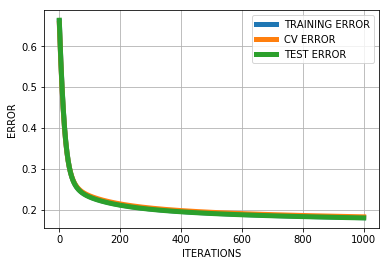

In [630]:
from  matplotlib import pyplot
pyplot.plot(train_error,label="TRAINING ERROR",linewidth=5)
pyplot.plot(cv_error,label="CV ERROR",linewidth=5)
pyplot.plot(test_error,label="TEST ERROR",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("ERROR")
pyplot.legend()
pyplot.grid()
pyplot.show()

## ACCURACY vs ITERATIONS PLOT FOR TRAIN,CV,TEST DATASETS WITHOUT REGULARIZATION

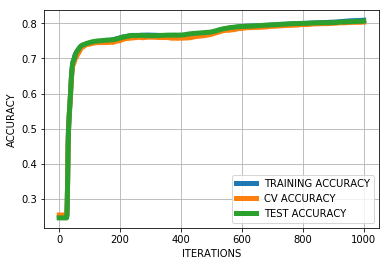

In [633]:
pyplot.plot(train_acc,label="TRAINING ACCURACY",linewidth=5)
pyplot.plot(cv_acc,label="CV ACCURACY",linewidth=5)
pyplot.plot(test_acc,label="TEST ACCURACY",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("ACCURACY")
pyplot.legend()
pyplot.grid()
pyplot.show()

## FUNCTION CALL TO GRADIENT DESCENT OF LOGISTIC REGRESSION WITH L1-REGULARIZATION

In [642]:
opt_w_001,train_error_001,train_acc_001,cv_error_001,cv_acc_001,test_error_001,test_acc_001 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,0.001,"l1")
print("\n")
opt_w_01,train_error_01,train_acc_01,cv_error_01,cv_acc_01,test_error_01,test_acc_01 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,0.01,"l1")
print("\n")
opt_w_0p1,train_error_0p1,train_acc_0p1,cv_error_0p1,cv_acc_0p1,test_error_0p1,test_acc_0p1 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,0.1,"l1")
print("\n")
opt_w_1,train_error_1,train_acc_1,cv_error_1,cv_acc_1,test_error_1,test_acc_1 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,1,"l1")
print("\n")
opt_w_10,train_error_10,train_acc_10,cv_error_10,cv_acc_10,test_error_10,test_acc_10 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,10,"l1")
print("\n")
opt_w_100,train_error_100,train_acc_100,cv_error_100,cv_acc_100,test_error_100,test_acc_100 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,100,"l1")
print("\n")
opt_w_1000,train_error_1000,train_acc_1000,cv_error_1000,cv_acc_1000,test_error_1000,test_acc_1000 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,1000,"l1")

in l1
iteration-i: 0 in l1
iteration-i: 1 in l1
iteration-i: 2 in l1
iteration-i: 3 in l1
iteration-i: 4 in l1
iteration-i: 5 in l1
iteration-i: 6 in l1
iteration-i: 7 in l1
iteration-i: 8 in l1
iteration-i: 9 in l1
iteration-i: 10 in l1
iteration-i: 11 in l1
iteration-i: 12 in l1
iteration-i: 13 in l1
iteration-i: 14 in l1
iteration-i: 15 in l1
iteration-i: 16 in l1
iteration-i: 17 in l1
iteration-i: 18 in l1
iteration-i: 19 in l1
iteration-i: 20 in l1
iteration-i: 21 in l1
iteration-i: 22 in l1
iteration-i: 23 in l1
iteration-i: 24 in l1
iteration-i: 25 in l1
iteration-i: 26 in l1
iteration-i: 27 in l1
iteration-i: 28 in l1
iteration-i: 29 in l1
iteration-i: 30 in l1
iteration-i: 31 in l1
iteration-i: 32 in l1
iteration-i: 33 in l1
iteration-i: 34 in l1
iteration-i: 35 in l1
iteration-i: 36 in l1
iteration-i: 37 in l1
iteration-i: 38 in l1
iteration-i: 39 in l1
iteration-i: 40 in l1
iteration-i: 41 in l1
iteration-i: 42 in l1
iteration-i: 43 in l1
iteration-i: 44 in l1
iteration-i: 4

iteration-i: 360 in l1
iteration-i: 361 in l1
iteration-i: 362 in l1
iteration-i: 363 in l1
iteration-i: 364 in l1
iteration-i: 365 in l1
iteration-i: 366 in l1
iteration-i: 367 in l1
iteration-i: 368 in l1
iteration-i: 369 in l1
iteration-i: 370 in l1
iteration-i: 371 in l1
iteration-i: 372 in l1
iteration-i: 373 in l1
iteration-i: 374 in l1
iteration-i: 375 in l1
iteration-i: 376 in l1
iteration-i: 377 in l1
iteration-i: 378 in l1
iteration-i: 379 in l1
iteration-i: 380 in l1
iteration-i: 381 in l1
iteration-i: 382 in l1
iteration-i: 383 in l1
iteration-i: 384 in l1
iteration-i: 385 in l1
iteration-i: 386 in l1
iteration-i: 387 in l1
iteration-i: 388 in l1
iteration-i: 389 in l1
iteration-i: 390 in l1
iteration-i: 391 in l1
iteration-i: 392 in l1
iteration-i: 393 in l1
iteration-i: 394 in l1
iteration-i: 395 in l1
iteration-i: 396 in l1
iteration-i: 397 in l1
iteration-i: 398 in l1
iteration-i: 399 in l1
iteration-i: 400 in l1
iteration-i: 401 in l1
iteration-i: 402 in l1
iteration-i

iteration-i: 716 in l1
iteration-i: 717 in l1
iteration-i: 718 in l1
iteration-i: 719 in l1
iteration-i: 720 in l1
iteration-i: 721 in l1
iteration-i: 722 in l1
iteration-i: 723 in l1
iteration-i: 724 in l1
iteration-i: 725 in l1
iteration-i: 726 in l1
iteration-i: 727 in l1
iteration-i: 728 in l1
iteration-i: 729 in l1
iteration-i: 730 in l1
iteration-i: 731 in l1
iteration-i: 732 in l1
iteration-i: 733 in l1
iteration-i: 734 in l1
iteration-i: 735 in l1
iteration-i: 736 in l1
iteration-i: 737 in l1
iteration-i: 738 in l1
iteration-i: 739 in l1
iteration-i: 740 in l1
iteration-i: 741 in l1
iteration-i: 742 in l1
iteration-i: 743 in l1
iteration-i: 744 in l1
iteration-i: 745 in l1
iteration-i: 746 in l1
iteration-i: 747 in l1
iteration-i: 748 in l1
iteration-i: 749 in l1
iteration-i: 750 in l1
iteration-i: 751 in l1
iteration-i: 752 in l1
iteration-i: 753 in l1
iteration-i: 754 in l1
iteration-i: 755 in l1
iteration-i: 756 in l1
iteration-i: 757 in l1
iteration-i: 758 in l1
iteration-i

iteration-i: 16 in l1
iteration-i: 17 in l1
iteration-i: 18 in l1
iteration-i: 19 in l1
iteration-i: 20 in l1
iteration-i: 21 in l1
iteration-i: 22 in l1
iteration-i: 23 in l1
iteration-i: 24 in l1
iteration-i: 25 in l1
iteration-i: 26 in l1
iteration-i: 27 in l1
iteration-i: 28 in l1
iteration-i: 29 in l1
iteration-i: 30 in l1
iteration-i: 31 in l1
iteration-i: 32 in l1
iteration-i: 33 in l1
iteration-i: 34 in l1
iteration-i: 35 in l1
iteration-i: 36 in l1
iteration-i: 37 in l1
iteration-i: 38 in l1
iteration-i: 39 in l1
iteration-i: 40 in l1
iteration-i: 41 in l1
iteration-i: 42 in l1
iteration-i: 43 in l1
iteration-i: 44 in l1
iteration-i: 45 in l1
iteration-i: 46 in l1
iteration-i: 47 in l1
iteration-i: 48 in l1
iteration-i: 49 in l1
iteration-i: 50 in l1
iteration-i: 51 in l1
iteration-i: 52 in l1
iteration-i: 53 in l1
iteration-i: 54 in l1
iteration-i: 55 in l1
iteration-i: 56 in l1
iteration-i: 57 in l1
iteration-i: 58 in l1
iteration-i: 59 in l1
iteration-i: 60 in l1
iteration-

iteration-i: 376 in l1
iteration-i: 377 in l1
iteration-i: 378 in l1
iteration-i: 379 in l1
iteration-i: 380 in l1
iteration-i: 381 in l1
iteration-i: 382 in l1
iteration-i: 383 in l1
iteration-i: 384 in l1
iteration-i: 385 in l1
iteration-i: 386 in l1
iteration-i: 387 in l1
iteration-i: 388 in l1
iteration-i: 389 in l1
iteration-i: 390 in l1
iteration-i: 391 in l1
iteration-i: 392 in l1
iteration-i: 393 in l1
iteration-i: 394 in l1
iteration-i: 395 in l1
iteration-i: 396 in l1
iteration-i: 397 in l1
iteration-i: 398 in l1
iteration-i: 399 in l1
iteration-i: 400 in l1
iteration-i: 401 in l1
iteration-i: 402 in l1
iteration-i: 403 in l1
iteration-i: 404 in l1
iteration-i: 405 in l1
iteration-i: 406 in l1
iteration-i: 407 in l1
iteration-i: 408 in l1
iteration-i: 409 in l1
iteration-i: 410 in l1
iteration-i: 411 in l1
iteration-i: 412 in l1
iteration-i: 413 in l1
iteration-i: 414 in l1
iteration-i: 415 in l1
iteration-i: 416 in l1
iteration-i: 417 in l1
iteration-i: 418 in l1
iteration-i

iteration-i: 732 in l1
iteration-i: 733 in l1
iteration-i: 734 in l1
iteration-i: 735 in l1
iteration-i: 736 in l1
iteration-i: 737 in l1
iteration-i: 738 in l1
iteration-i: 739 in l1
iteration-i: 740 in l1
iteration-i: 741 in l1
iteration-i: 742 in l1
iteration-i: 743 in l1
iteration-i: 744 in l1
iteration-i: 745 in l1
iteration-i: 746 in l1
iteration-i: 747 in l1
iteration-i: 748 in l1
iteration-i: 749 in l1
iteration-i: 750 in l1
iteration-i: 751 in l1
iteration-i: 752 in l1
iteration-i: 753 in l1
iteration-i: 754 in l1
iteration-i: 755 in l1
iteration-i: 756 in l1
iteration-i: 757 in l1
iteration-i: 758 in l1
iteration-i: 759 in l1
iteration-i: 760 in l1
iteration-i: 761 in l1
iteration-i: 762 in l1
iteration-i: 763 in l1
iteration-i: 764 in l1
iteration-i: 765 in l1
iteration-i: 766 in l1
iteration-i: 767 in l1
iteration-i: 768 in l1
iteration-i: 769 in l1
iteration-i: 770 in l1
iteration-i: 771 in l1
iteration-i: 772 in l1
iteration-i: 773 in l1
iteration-i: 774 in l1
iteration-i

iteration-i: 33 in l1
iteration-i: 34 in l1
iteration-i: 35 in l1
iteration-i: 36 in l1
iteration-i: 37 in l1
iteration-i: 38 in l1
iteration-i: 39 in l1
iteration-i: 40 in l1
iteration-i: 41 in l1
iteration-i: 42 in l1
iteration-i: 43 in l1
iteration-i: 44 in l1
iteration-i: 45 in l1
iteration-i: 46 in l1
iteration-i: 47 in l1
iteration-i: 48 in l1
iteration-i: 49 in l1
iteration-i: 50 in l1
iteration-i: 51 in l1
iteration-i: 52 in l1
iteration-i: 53 in l1
iteration-i: 54 in l1
iteration-i: 55 in l1
iteration-i: 56 in l1
iteration-i: 57 in l1
iteration-i: 58 in l1
iteration-i: 59 in l1
iteration-i: 60 in l1
iteration-i: 61 in l1
iteration-i: 62 in l1
iteration-i: 63 in l1
iteration-i: 64 in l1
iteration-i: 65 in l1
iteration-i: 66 in l1
iteration-i: 67 in l1
iteration-i: 68 in l1
iteration-i: 69 in l1
iteration-i: 70 in l1
iteration-i: 71 in l1
iteration-i: 72 in l1
iteration-i: 73 in l1
iteration-i: 74 in l1
iteration-i: 75 in l1
iteration-i: 76 in l1
iteration-i: 77 in l1
iteration-

iteration-i: 392 in l1
iteration-i: 393 in l1
iteration-i: 394 in l1
iteration-i: 395 in l1
iteration-i: 396 in l1
iteration-i: 397 in l1
iteration-i: 398 in l1
iteration-i: 399 in l1
iteration-i: 400 in l1
iteration-i: 401 in l1
iteration-i: 402 in l1
iteration-i: 403 in l1
iteration-i: 404 in l1
iteration-i: 405 in l1
iteration-i: 406 in l1
iteration-i: 407 in l1
iteration-i: 408 in l1
iteration-i: 409 in l1
iteration-i: 410 in l1
iteration-i: 411 in l1
iteration-i: 412 in l1
iteration-i: 413 in l1
iteration-i: 414 in l1
iteration-i: 415 in l1
iteration-i: 416 in l1
iteration-i: 417 in l1
iteration-i: 418 in l1
iteration-i: 419 in l1
iteration-i: 420 in l1
iteration-i: 421 in l1
iteration-i: 422 in l1
iteration-i: 423 in l1
iteration-i: 424 in l1
iteration-i: 425 in l1
iteration-i: 426 in l1
iteration-i: 427 in l1
iteration-i: 428 in l1
iteration-i: 429 in l1
iteration-i: 430 in l1
iteration-i: 431 in l1
iteration-i: 432 in l1
iteration-i: 433 in l1
iteration-i: 434 in l1
iteration-i

iteration-i: 748 in l1
iteration-i: 749 in l1
iteration-i: 750 in l1
iteration-i: 751 in l1
iteration-i: 752 in l1
iteration-i: 753 in l1
iteration-i: 754 in l1
iteration-i: 755 in l1
iteration-i: 756 in l1
iteration-i: 757 in l1
iteration-i: 758 in l1
iteration-i: 759 in l1
iteration-i: 760 in l1
iteration-i: 761 in l1
iteration-i: 762 in l1
iteration-i: 763 in l1
iteration-i: 764 in l1
iteration-i: 765 in l1
iteration-i: 766 in l1
iteration-i: 767 in l1
iteration-i: 768 in l1
iteration-i: 769 in l1
iteration-i: 770 in l1
iteration-i: 771 in l1
iteration-i: 772 in l1
iteration-i: 773 in l1
iteration-i: 774 in l1
iteration-i: 775 in l1
iteration-i: 776 in l1
iteration-i: 777 in l1
iteration-i: 778 in l1
iteration-i: 779 in l1
iteration-i: 780 in l1
iteration-i: 781 in l1
iteration-i: 782 in l1
iteration-i: 783 in l1
iteration-i: 784 in l1
iteration-i: 785 in l1
iteration-i: 786 in l1
iteration-i: 787 in l1
iteration-i: 788 in l1
iteration-i: 789 in l1
iteration-i: 790 in l1
iteration-i

iteration-i: 50 in l1
iteration-i: 51 in l1
iteration-i: 52 in l1
iteration-i: 53 in l1
iteration-i: 54 in l1
iteration-i: 55 in l1
iteration-i: 56 in l1
iteration-i: 57 in l1
iteration-i: 58 in l1
iteration-i: 59 in l1
iteration-i: 60 in l1
iteration-i: 61 in l1
iteration-i: 62 in l1
iteration-i: 63 in l1
iteration-i: 64 in l1
iteration-i: 65 in l1
iteration-i: 66 in l1
iteration-i: 67 in l1
iteration-i: 68 in l1
iteration-i: 69 in l1
iteration-i: 70 in l1
iteration-i: 71 in l1
iteration-i: 72 in l1
iteration-i: 73 in l1
iteration-i: 74 in l1
iteration-i: 75 in l1
iteration-i: 76 in l1
iteration-i: 77 in l1
iteration-i: 78 in l1
iteration-i: 79 in l1
iteration-i: 80 in l1
iteration-i: 81 in l1
iteration-i: 82 in l1
iteration-i: 83 in l1
iteration-i: 84 in l1
iteration-i: 85 in l1
iteration-i: 86 in l1
iteration-i: 87 in l1
iteration-i: 88 in l1
iteration-i: 89 in l1
iteration-i: 90 in l1
iteration-i: 91 in l1
iteration-i: 92 in l1
iteration-i: 93 in l1
iteration-i: 94 in l1
iteration-

iteration-i: 408 in l1
iteration-i: 409 in l1
iteration-i: 410 in l1
iteration-i: 411 in l1
iteration-i: 412 in l1
iteration-i: 413 in l1
iteration-i: 414 in l1
iteration-i: 415 in l1
iteration-i: 416 in l1
iteration-i: 417 in l1
iteration-i: 418 in l1
iteration-i: 419 in l1
iteration-i: 420 in l1
iteration-i: 421 in l1
iteration-i: 422 in l1
iteration-i: 423 in l1
iteration-i: 424 in l1
iteration-i: 425 in l1
iteration-i: 426 in l1
iteration-i: 427 in l1
iteration-i: 428 in l1
iteration-i: 429 in l1
iteration-i: 430 in l1
iteration-i: 431 in l1
iteration-i: 432 in l1
iteration-i: 433 in l1
iteration-i: 434 in l1
iteration-i: 435 in l1
iteration-i: 436 in l1
iteration-i: 437 in l1
iteration-i: 438 in l1
iteration-i: 439 in l1
iteration-i: 440 in l1
iteration-i: 441 in l1
iteration-i: 442 in l1
iteration-i: 443 in l1
iteration-i: 444 in l1
iteration-i: 445 in l1
iteration-i: 446 in l1
iteration-i: 447 in l1
iteration-i: 448 in l1
iteration-i: 449 in l1
iteration-i: 450 in l1
iteration-i

iteration-i: 764 in l1
iteration-i: 765 in l1
iteration-i: 766 in l1
iteration-i: 767 in l1
iteration-i: 768 in l1
iteration-i: 769 in l1
iteration-i: 770 in l1
iteration-i: 771 in l1
iteration-i: 772 in l1
iteration-i: 773 in l1
iteration-i: 774 in l1
iteration-i: 775 in l1
iteration-i: 776 in l1
iteration-i: 777 in l1
iteration-i: 778 in l1
iteration-i: 779 in l1
iteration-i: 780 in l1
iteration-i: 781 in l1
iteration-i: 782 in l1
iteration-i: 783 in l1
iteration-i: 784 in l1
iteration-i: 785 in l1
iteration-i: 786 in l1
iteration-i: 787 in l1
iteration-i: 788 in l1
iteration-i: 789 in l1
iteration-i: 790 in l1
iteration-i: 791 in l1
iteration-i: 792 in l1
iteration-i: 793 in l1
iteration-i: 794 in l1
iteration-i: 795 in l1
iteration-i: 796 in l1
iteration-i: 797 in l1
iteration-i: 798 in l1
iteration-i: 799 in l1
iteration-i: 800 in l1
iteration-i: 801 in l1
iteration-i: 802 in l1
iteration-i: 803 in l1
iteration-i: 804 in l1
iteration-i: 805 in l1
iteration-i: 806 in l1
iteration-i

iteration-i: 66 in l1
iteration-i: 67 in l1
iteration-i: 68 in l1
iteration-i: 69 in l1
iteration-i: 70 in l1
iteration-i: 71 in l1
iteration-i: 72 in l1
iteration-i: 73 in l1
iteration-i: 74 in l1
iteration-i: 75 in l1
iteration-i: 76 in l1
iteration-i: 77 in l1
iteration-i: 78 in l1
iteration-i: 79 in l1
iteration-i: 80 in l1
iteration-i: 81 in l1
iteration-i: 82 in l1
iteration-i: 83 in l1
iteration-i: 84 in l1
iteration-i: 85 in l1
iteration-i: 86 in l1
iteration-i: 87 in l1
iteration-i: 88 in l1
iteration-i: 89 in l1
iteration-i: 90 in l1
iteration-i: 91 in l1
iteration-i: 92 in l1
iteration-i: 93 in l1
iteration-i: 94 in l1
iteration-i: 95 in l1
iteration-i: 96 in l1
iteration-i: 97 in l1
iteration-i: 98 in l1
iteration-i: 99 in l1
iteration-i: 100 in l1
iteration-i: 101 in l1
iteration-i: 102 in l1
iteration-i: 103 in l1
iteration-i: 104 in l1
iteration-i: 105 in l1
iteration-i: 106 in l1
iteration-i: 107 in l1
iteration-i: 108 in l1
iteration-i: 109 in l1
iteration-i: 110 in l1

iteration-i: 423 in l1
iteration-i: 424 in l1
iteration-i: 425 in l1
iteration-i: 426 in l1
iteration-i: 427 in l1
iteration-i: 428 in l1
iteration-i: 429 in l1
iteration-i: 430 in l1
iteration-i: 431 in l1
iteration-i: 432 in l1
iteration-i: 433 in l1
iteration-i: 434 in l1
iteration-i: 435 in l1
iteration-i: 436 in l1
iteration-i: 437 in l1
iteration-i: 438 in l1
iteration-i: 439 in l1
iteration-i: 440 in l1
iteration-i: 441 in l1
iteration-i: 442 in l1
iteration-i: 443 in l1
iteration-i: 444 in l1
iteration-i: 445 in l1
iteration-i: 446 in l1
iteration-i: 447 in l1
iteration-i: 448 in l1
iteration-i: 449 in l1
iteration-i: 450 in l1
iteration-i: 451 in l1
iteration-i: 452 in l1
iteration-i: 453 in l1
iteration-i: 454 in l1
iteration-i: 455 in l1
iteration-i: 456 in l1
iteration-i: 457 in l1
iteration-i: 458 in l1
iteration-i: 459 in l1
iteration-i: 460 in l1
iteration-i: 461 in l1
iteration-i: 462 in l1
iteration-i: 463 in l1
iteration-i: 464 in l1
iteration-i: 465 in l1
iteration-i

iteration-i: 779 in l1
iteration-i: 780 in l1
iteration-i: 781 in l1
iteration-i: 782 in l1
iteration-i: 783 in l1
iteration-i: 784 in l1
iteration-i: 785 in l1
iteration-i: 786 in l1
iteration-i: 787 in l1
iteration-i: 788 in l1
iteration-i: 789 in l1
iteration-i: 790 in l1
iteration-i: 791 in l1
iteration-i: 792 in l1
iteration-i: 793 in l1
iteration-i: 794 in l1
iteration-i: 795 in l1
iteration-i: 796 in l1
iteration-i: 797 in l1
iteration-i: 798 in l1
iteration-i: 799 in l1
iteration-i: 800 in l1
iteration-i: 801 in l1
iteration-i: 802 in l1
iteration-i: 803 in l1
iteration-i: 804 in l1
iteration-i: 805 in l1
iteration-i: 806 in l1
iteration-i: 807 in l1
iteration-i: 808 in l1
iteration-i: 809 in l1
iteration-i: 810 in l1
iteration-i: 811 in l1
iteration-i: 812 in l1
iteration-i: 813 in l1
iteration-i: 814 in l1
iteration-i: 815 in l1
iteration-i: 816 in l1
iteration-i: 817 in l1
iteration-i: 818 in l1
iteration-i: 819 in l1
iteration-i: 820 in l1
iteration-i: 821 in l1
iteration-i

iteration-i: 82 in l1
iteration-i: 83 in l1
iteration-i: 84 in l1
iteration-i: 85 in l1
iteration-i: 86 in l1
iteration-i: 87 in l1
iteration-i: 88 in l1
iteration-i: 89 in l1
iteration-i: 90 in l1
iteration-i: 91 in l1
iteration-i: 92 in l1
iteration-i: 93 in l1
iteration-i: 94 in l1
iteration-i: 95 in l1
iteration-i: 96 in l1
iteration-i: 97 in l1
iteration-i: 98 in l1
iteration-i: 99 in l1
iteration-i: 100 in l1
iteration-i: 101 in l1
iteration-i: 102 in l1
iteration-i: 103 in l1
iteration-i: 104 in l1
iteration-i: 105 in l1
iteration-i: 106 in l1
iteration-i: 107 in l1
iteration-i: 108 in l1
iteration-i: 109 in l1
iteration-i: 110 in l1
iteration-i: 111 in l1
iteration-i: 112 in l1
iteration-i: 113 in l1
iteration-i: 114 in l1
iteration-i: 115 in l1
iteration-i: 116 in l1
iteration-i: 117 in l1
iteration-i: 118 in l1
iteration-i: 119 in l1
iteration-i: 120 in l1
iteration-i: 121 in l1
iteration-i: 122 in l1
iteration-i: 123 in l1
iteration-i: 124 in l1
iteration-i: 125 in l1
iterat

iteration-i: 439 in l1
iteration-i: 440 in l1
iteration-i: 441 in l1
iteration-i: 442 in l1
iteration-i: 443 in l1
iteration-i: 444 in l1
iteration-i: 445 in l1
iteration-i: 446 in l1
iteration-i: 447 in l1
iteration-i: 448 in l1
iteration-i: 449 in l1
iteration-i: 450 in l1
iteration-i: 451 in l1
iteration-i: 452 in l1
iteration-i: 453 in l1
iteration-i: 454 in l1
iteration-i: 455 in l1
iteration-i: 456 in l1
iteration-i: 457 in l1
iteration-i: 458 in l1
iteration-i: 459 in l1
iteration-i: 460 in l1
iteration-i: 461 in l1
iteration-i: 462 in l1
iteration-i: 463 in l1
iteration-i: 464 in l1
iteration-i: 465 in l1
iteration-i: 466 in l1
iteration-i: 467 in l1
iteration-i: 468 in l1
iteration-i: 469 in l1
iteration-i: 470 in l1
iteration-i: 471 in l1
iteration-i: 472 in l1
iteration-i: 473 in l1
iteration-i: 474 in l1
iteration-i: 475 in l1
iteration-i: 476 in l1
iteration-i: 477 in l1
iteration-i: 478 in l1
iteration-i: 479 in l1
iteration-i: 480 in l1
iteration-i: 481 in l1
iteration-i

iteration-i: 795 in l1
iteration-i: 796 in l1
iteration-i: 797 in l1
iteration-i: 798 in l1
iteration-i: 799 in l1
iteration-i: 800 in l1
iteration-i: 801 in l1
iteration-i: 802 in l1
iteration-i: 803 in l1
iteration-i: 804 in l1
iteration-i: 805 in l1
iteration-i: 806 in l1
iteration-i: 807 in l1
iteration-i: 808 in l1
iteration-i: 809 in l1
iteration-i: 810 in l1
iteration-i: 811 in l1
iteration-i: 812 in l1
iteration-i: 813 in l1
iteration-i: 814 in l1
iteration-i: 815 in l1
iteration-i: 816 in l1
iteration-i: 817 in l1
iteration-i: 818 in l1
iteration-i: 819 in l1
iteration-i: 820 in l1
iteration-i: 821 in l1
iteration-i: 822 in l1
iteration-i: 823 in l1
iteration-i: 824 in l1
iteration-i: 825 in l1
iteration-i: 826 in l1
iteration-i: 827 in l1
iteration-i: 828 in l1
iteration-i: 829 in l1
iteration-i: 830 in l1
iteration-i: 831 in l1
iteration-i: 832 in l1
iteration-i: 833 in l1
iteration-i: 834 in l1
iteration-i: 835 in l1
iteration-i: 836 in l1
iteration-i: 837 in l1
iteration-i

iteration-i: 99 in l1
iteration-i: 100 in l1
iteration-i: 101 in l1
iteration-i: 102 in l1
iteration-i: 103 in l1
iteration-i: 104 in l1
iteration-i: 105 in l1
iteration-i: 106 in l1
iteration-i: 107 in l1
iteration-i: 108 in l1
iteration-i: 109 in l1
iteration-i: 110 in l1
iteration-i: 111 in l1
iteration-i: 112 in l1
iteration-i: 113 in l1
iteration-i: 114 in l1
iteration-i: 115 in l1
iteration-i: 116 in l1
iteration-i: 117 in l1
iteration-i: 118 in l1
iteration-i: 119 in l1
iteration-i: 120 in l1
iteration-i: 121 in l1
iteration-i: 122 in l1
iteration-i: 123 in l1
iteration-i: 124 in l1
iteration-i: 125 in l1
iteration-i: 126 in l1
iteration-i: 127 in l1
iteration-i: 128 in l1
iteration-i: 129 in l1
iteration-i: 130 in l1
iteration-i: 131 in l1
iteration-i: 132 in l1
iteration-i: 133 in l1
iteration-i: 134 in l1
iteration-i: 135 in l1
iteration-i: 136 in l1
iteration-i: 137 in l1
iteration-i: 138 in l1
iteration-i: 139 in l1
iteration-i: 140 in l1
iteration-i: 141 in l1
iteration-i:

iteration-i: 455 in l1
iteration-i: 456 in l1
iteration-i: 457 in l1
iteration-i: 458 in l1
iteration-i: 459 in l1
iteration-i: 460 in l1
iteration-i: 461 in l1
iteration-i: 462 in l1
iteration-i: 463 in l1
iteration-i: 464 in l1
iteration-i: 465 in l1
iteration-i: 466 in l1
iteration-i: 467 in l1
iteration-i: 468 in l1
iteration-i: 469 in l1
iteration-i: 470 in l1
iteration-i: 471 in l1
iteration-i: 472 in l1
iteration-i: 473 in l1
iteration-i: 474 in l1
iteration-i: 475 in l1
iteration-i: 476 in l1
iteration-i: 477 in l1
iteration-i: 478 in l1
iteration-i: 479 in l1
iteration-i: 480 in l1
iteration-i: 481 in l1
iteration-i: 482 in l1
iteration-i: 483 in l1
iteration-i: 484 in l1
iteration-i: 485 in l1
iteration-i: 486 in l1
iteration-i: 487 in l1
iteration-i: 488 in l1
iteration-i: 489 in l1
iteration-i: 490 in l1
iteration-i: 491 in l1
iteration-i: 492 in l1
iteration-i: 493 in l1
iteration-i: 494 in l1
iteration-i: 495 in l1
iteration-i: 496 in l1
iteration-i: 497 in l1
iteration-i

iteration-i: 811 in l1
iteration-i: 812 in l1
iteration-i: 813 in l1
iteration-i: 814 in l1
iteration-i: 815 in l1
iteration-i: 816 in l1
iteration-i: 817 in l1
iteration-i: 818 in l1
iteration-i: 819 in l1
iteration-i: 820 in l1
iteration-i: 821 in l1
iteration-i: 822 in l1
iteration-i: 823 in l1
iteration-i: 824 in l1
iteration-i: 825 in l1
iteration-i: 826 in l1
iteration-i: 827 in l1
iteration-i: 828 in l1
iteration-i: 829 in l1
iteration-i: 830 in l1
iteration-i: 831 in l1
iteration-i: 832 in l1
iteration-i: 833 in l1
iteration-i: 834 in l1
iteration-i: 835 in l1
iteration-i: 836 in l1
iteration-i: 837 in l1
iteration-i: 838 in l1
iteration-i: 839 in l1
iteration-i: 840 in l1
iteration-i: 841 in l1
iteration-i: 842 in l1
iteration-i: 843 in l1
iteration-i: 844 in l1
iteration-i: 845 in l1
iteration-i: 846 in l1
iteration-i: 847 in l1
iteration-i: 848 in l1
iteration-i: 849 in l1
iteration-i: 850 in l1
iteration-i: 851 in l1
iteration-i: 852 in l1
iteration-i: 853 in l1
iteration-i

## FINAL TRAINING ERROR WITH L1 REGULARIZATION WITH VARIOUS LAMBDA'S

In [643]:
print("FINAL TRAIN ERROR WITH LAMBDA=0.001 is",train_error_001[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=0.01 is",train_error_01[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=0.1 is",train_error_0p1[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=1 is",train_error_1[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=10 is",train_error_10[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=100 is",train_error_100[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=1000 is",train_error_1000[1000])

FINAL TRAIN ERROR WITH LAMBDA=0.001 0.18064716869860772
FINAL TRAIN ERROR WITH LAMBDA=0.01 0.18064332705182076
FINAL TRAIN ERROR WITH LAMBDA=0.1 0.18060521553336076
FINAL TRAIN ERROR WITH LAMBDA=1 0.18025276832275178
FINAL TRAIN ERROR WITH LAMBDA=10 0.1784439544764289
FINAL TRAIN ERROR WITH LAMBDA=100 0.17808805422111243
FINAL TRAIN ERROR WITH LAMBDA=1000 0.17826952759022452


## FINAL CV ERROR WITH L1 REGULARIZATION

In [645]:
print("FINAL CV ERROR WITH LAMBDA=0.001 is",cv_error_001[1000])
print("FINAL CV ERROR WITH LAMBDA=0.01 is",cv_error_01[1000])
print("FINAL CV ERROR WITH LAMBDA=0.1 is",cv_error_0p1[1000])
print("FINAL CV ERROR WITH LAMBDA=1 is",cv_error_1[1000])
print("FINAL CV ERROR WITH LAMBDA=10 is",cv_error_10[1000])
print("FINAL CV ERROR WITH LAMBDA=100 is",cv_error_100[1000])
print("FINAL CV ERROR WITH LAMBDA=1000 is",cv_error_1000[1000])

FINAL CV ERROR WITH LAMBDA=0.001 is 0.18267608475098546
FINAL CV ERROR WITH LAMBDA=0.01 is 0.18267213223646248
FINAL CV ERROR WITH LAMBDA=0.1 is 0.18263291766565462
FINAL CV ERROR WITH LAMBDA=1 is 0.18226997523507565
FINAL CV ERROR WITH LAMBDA=10 is 0.18039155777811178
FINAL CV ERROR WITH LAMBDA=100 is 0.1799513853552105
FINAL CV ERROR WITH LAMBDA=1000 is 0.18013026895224743


## FINAL TEST ERROR WITH L1 REGULARIZATION

In [646]:
print("FINAL TEST ERROR WITH LAMBDA=0.001 is",test_error_001[1000])
print("FINAL TEST ERROR WITH LAMBDA=0.01 is",test_error_01[1000])
print("FINAL TEST ERROR WITH LAMBDA=0.1 is",test_error_0p1[1000])
print("FINAL TEST ERROR WITH LAMBDA=1 is",test_error_1[1000])
print("FINAL TEST ERROR WITH LAMBDA=10 is",test_error_10[1000])
print("FINAL TEST ERROR WITH LAMBDA=100 is",test_error_100[1000])
print("FINAL TEST ERROR WITH LAMBDA=1000 is",test_error_1000[1000])

FINAL TEST ERROR WITH LAMBDA=0.001 is 0.18001453530540396
FINAL TEST ERROR WITH LAMBDA=0.01 is 0.1800105705453901
FINAL TEST ERROR WITH LAMBDA=0.1 is 0.1799712385426582
FINAL TEST ERROR WITH LAMBDA=1 is 0.17960760636582185
FINAL TEST ERROR WITH LAMBDA=10 is 0.17775406709257668
FINAL TEST ERROR WITH LAMBDA=100 is 0.17745571795372117
FINAL TEST ERROR WITH LAMBDA=1000 is 0.17764408630862602


## FINAL TRAINING ACCURACY WITH L1 REGULARIZATION

In [647]:
print("FINAL TRAINING ACCURACY WITH LAMBDA=0.001 is",train_acc_001[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=0.01 is",train_acc_01[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=0.1 is",train_acc_0p1[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=1 is",train_acc_1[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=10 is",train_acc_10[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=100 is",train_acc_100[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=1000 is",train_acc_1000[1000]*100,"%")

FINAL TRAINING ACCURACY WITH LAMBDA=0.001 is 80.88942307692307 %
FINAL TRAINING ACCURACY WITH LAMBDA=0.01 is 80.89356763925728 %
FINAL TRAINING ACCURACY WITH LAMBDA=0.1 is 80.91014588859416 %
FINAL TRAINING ACCURACY WITH LAMBDA=1 is 80.99303713527851 %
FINAL TRAINING ACCURACY WITH LAMBDA=10 is 81.37433687002653 %
FINAL TRAINING ACCURACY WITH LAMBDA=100 is 81.535974801061 %
FINAL TRAINING ACCURACY WITH LAMBDA=1000 is 81.53183023872678 %


## FINAL CV ACCURACY WITH L1 REGULARIZATION

In [648]:
print("FINAL CV ACCURACY WITH LAMBDA=0.001 is",cv_acc_001[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=0.01 is",cv_acc_01[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=0.1 is",cv_acc_0p1[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=1 is",cv_acc_1[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=10 is",cv_acc_10[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=100 is",cv_acc_100[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=1000 is",cv_acc_1000[1000]*100,"%")

FINAL CV ACCURACY WITH LAMBDA=0.001 is 80.35477453580901 %
FINAL CV ACCURACY WITH LAMBDA=0.01 is 80.35477453580901 %
FINAL CV ACCURACY WITH LAMBDA=0.1 is 80.35477453580901 %
FINAL CV ACCURACY WITH LAMBDA=1 is 80.35477453580901 %
FINAL CV ACCURACY WITH LAMBDA=10 is 80.7526525198939 %
FINAL CV ACCURACY WITH LAMBDA=100 is 81.01790450928382 %
FINAL CV ACCURACY WITH LAMBDA=1000 is 81.03448275862068 %


## FINAL TEST ACCURACY WITH L1 REGULARIZATION

In [649]:
print("FINAL TEST ACCURACY WITH LAMBDA=0.001 is",test_acc_001[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=0.01 is",test_acc_01[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=0.1 is",test_acc_0p1[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=1 is",test_acc_1[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=10 is",test_acc_10[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=100 is",test_acc_100[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=1000 is",test_acc_1000[1000]*100,"%")

FINAL TEST ACCURACY WITH LAMBDA=0.001 is 80.63616441994822 %
FINAL TEST ACCURACY WITH LAMBDA=0.01 is 80.63616441994822 %
FINAL TEST ACCURACY WITH LAMBDA=0.1 is 80.66272660867256 %
FINAL TEST ACCURACY WITH LAMBDA=1 is 80.78225645793214 %
FINAL TEST ACCURACY WITH LAMBDA=10 is 81.14748655289196 %
FINAL TEST ACCURACY WITH LAMBDA=100 is 81.33342187396242 %
FINAL TEST ACCURACY WITH LAMBDA=1000 is 81.30685968523807 %


## TRAIN ERROR v/s ITERATIONS WITH L1 REGULARIZATION WITH VARIOUS LAMBDA'S

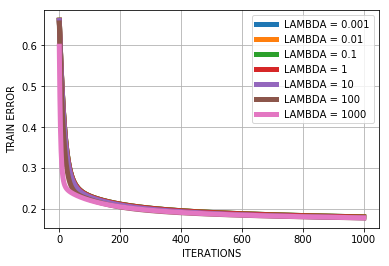

In [650]:
pyplot.plot(train_error_001,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(train_error_01,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(train_error_0p1,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(train_error_1,label="LAMBDA = 1",linewidth=5)
pyplot.plot(train_error_10,label="LAMBDA = 10",linewidth=5)
pyplot.plot(train_error_100,label="LAMBDA = 100",linewidth=5)
pyplot.plot(train_error_1000,label="LAMBDA = 1000",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("TRAIN ERROR")
pyplot.legend()
pyplot.grid()
pyplot.show()

## CV ERROR v/s ITERATIONS WITH L1 REGULARIZATION WITH VARIOUS LAMBDA'S

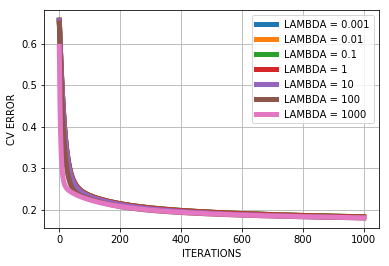

In [651]:
pyplot.plot(cv_error_001,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(cv_error_01,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(cv_error_0p1,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(cv_error_1,label="LAMBDA = 1",linewidth=5)
pyplot.plot(cv_error_10,label="LAMBDA = 10",linewidth=5)
pyplot.plot(cv_error_100,label="LAMBDA = 100",linewidth=5)
pyplot.plot(cv_error_1000,label="LAMBDA = 1000",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("CV ERROR")
pyplot.legend()
pyplot.grid()
pyplot.show()

## TEST ERROR v/s ITERATIONS WITH L1 REGULARIZATION WITH VARIOUS LAMBDA'S

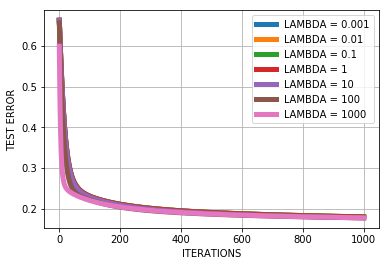

In [652]:
pyplot.plot(test_error_001,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(test_error_01,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(test_error_0p1,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(test_error_1,label="LAMBDA = 1",linewidth=5)
pyplot.plot(test_error_10,label="LAMBDA = 10",linewidth=5)
pyplot.plot(test_error_100,label="LAMBDA = 100",linewidth=5)
pyplot.plot(test_error_1000,label="LAMBDA = 1000",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("TEST ERROR")
pyplot.legend()
pyplot.grid()
pyplot.show()

## TRAIN ACCURACY v/s ITERATIONS WITH L1 REGULARIZATION WITH VARIOUS LAMBDA'S

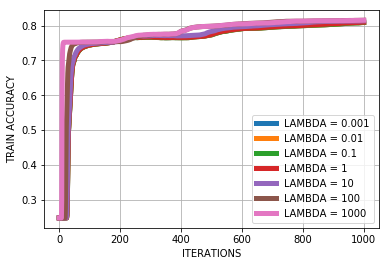

In [653]:
pyplot.plot(train_acc_001,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(train_acc_01,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(train_acc_0p1,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(train_acc_1,label="LAMBDA = 1",linewidth=5)
pyplot.plot(train_acc_10,label="LAMBDA = 10",linewidth=5)
pyplot.plot(train_acc_100,label="LAMBDA = 100",linewidth=5)
pyplot.plot(train_acc_1000,label="LAMBDA = 1000",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("TRAIN ACCURACY")
pyplot.legend()
pyplot.grid()
pyplot.show()

## CV ACCURACY v/s ITERATIONS WITH L1 REGULARIZATION WITH VARIOUS LAMBDA'S

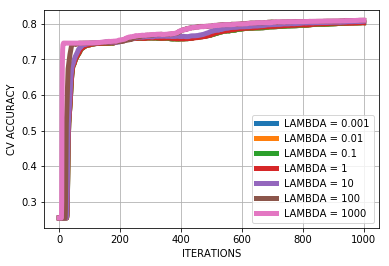

In [654]:
pyplot.plot(cv_acc_001,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(cv_acc_01,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(cv_acc_0p1,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(cv_acc_1,label="LAMBDA = 1",linewidth=5)
pyplot.plot(cv_acc_10,label="LAMBDA = 10",linewidth=5)
pyplot.plot(cv_acc_100,label="LAMBDA = 100",linewidth=5)
pyplot.plot(cv_acc_1000,label="LAMBDA = 1000",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("CV ACCURACY")
pyplot.legend()
pyplot.grid()
pyplot.show()

## TEST ACCURACY v/s ITERATIONS WITH L1 REGULARIZATION WITH VARIOUS LAMBDA'S

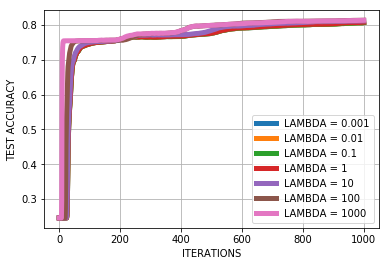

In [655]:
pyplot.plot(test_acc_001,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(test_acc_01,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(test_acc_0p1,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(test_acc_1,label="LAMBDA = 1",linewidth=5)
pyplot.plot(test_acc_10,label="LAMBDA = 10",linewidth=5)
pyplot.plot(test_acc_100,label="LAMBDA = 100",linewidth=5)
pyplot.plot(test_acc_1000,label="LAMBDA = 1000",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("TEST ACCURACY")
pyplot.legend()
pyplot.grid()
pyplot.show()

# BEST LAMBDA FOR L1 REGULARIZATION IS "100" WITH TEST ACCURACY OF 81.33% AND TEST ERROR OF 0.1774

## FUNCTION CALL TO GRADIENT DESCENT OF LOGISTIC REGRESSION WITH L2-REGULARIZATION

In [659]:
opt_w_001_l2,train_error_001_l2,train_acc_001_l2,cv_error_001_l2,cv_acc_001_l2,test_error_001_l2,test_acc_001_l2 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,0.001,"l2")
print("\n")
opt_w_01_l2,train_error_01_l2,train_acc_01_l2,cv_error_01_l2,cv_acc_01_l2,test_error_01_l2,test_acc_01_l2 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,0.01,"l2")
print("\n")
opt_w_0p1_l2,train_error_0p1_l2,train_acc_0p1_l2,cv_error_0p1_l2,cv_acc_0p1_l2,test_error_0p1_l2,test_acc_0p1_l2 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,0.1,"l2")
print("\n")
opt_w_1_l2,train_error_1_l2,train_acc_1_l2,cv_error_1_l2,cv_acc_1_l2,test_error_1_l2,test_acc_1_l2 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,1,"l2")
print("\n")
opt_w_10_l2,train_error_10_l2,train_acc_10_l2,cv_error_10_l2,cv_acc_10_l2,test_error_10_l2,test_acc_10_l2 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,10,"l2")
print("\n")
opt_w_100_l2,train_error_100_l2,train_acc_100_l2,cv_error_100_l2,cv_acc_100_l2,test_error_100_l2,test_acc_100_l2 = grad_des_logr(train_data_orig_x_mtx_std,train_data_orig_y_mtx_std,cv_data_orig_x_mtx_std,cv_data_orig_y_mtx_std,test_data_orig_x_mtx_std,test_data_orig_y_mtx_std,100,"l2")

in l2
iteration-i: 0 in l2
iteration-i: 1 in l2
iteration-i: 2 in l2
iteration-i: 3 in l2
iteration-i: 4 in l2
iteration-i: 5 in l2
iteration-i: 6 in l2
iteration-i: 7 in l2
iteration-i: 8 in l2
iteration-i: 9 in l2
iteration-i: 10 in l2
iteration-i: 11 in l2
iteration-i: 12 in l2
iteration-i: 13 in l2
iteration-i: 14 in l2
iteration-i: 15 in l2
iteration-i: 16 in l2
iteration-i: 17 in l2
iteration-i: 18 in l2
iteration-i: 19 in l2
iteration-i: 20 in l2
iteration-i: 21 in l2
iteration-i: 22 in l2
iteration-i: 23 in l2
iteration-i: 24 in l2
iteration-i: 25 in l2
iteration-i: 26 in l2
iteration-i: 27 in l2
iteration-i: 28 in l2
iteration-i: 29 in l2
iteration-i: 30 in l2
iteration-i: 31 in l2
iteration-i: 32 in l2
iteration-i: 33 in l2
iteration-i: 34 in l2
iteration-i: 35 in l2
iteration-i: 36 in l2
iteration-i: 37 in l2
iteration-i: 38 in l2
iteration-i: 39 in l2
iteration-i: 40 in l2
iteration-i: 41 in l2
iteration-i: 42 in l2
iteration-i: 43 in l2
iteration-i: 44 in l2
iteration-i: 4

iteration-i: 360 in l2
iteration-i: 361 in l2
iteration-i: 362 in l2
iteration-i: 363 in l2
iteration-i: 364 in l2
iteration-i: 365 in l2
iteration-i: 366 in l2
iteration-i: 367 in l2
iteration-i: 368 in l2
iteration-i: 369 in l2
iteration-i: 370 in l2
iteration-i: 371 in l2
iteration-i: 372 in l2
iteration-i: 373 in l2
iteration-i: 374 in l2
iteration-i: 375 in l2
iteration-i: 376 in l2
iteration-i: 377 in l2
iteration-i: 378 in l2
iteration-i: 379 in l2
iteration-i: 380 in l2
iteration-i: 381 in l2
iteration-i: 382 in l2
iteration-i: 383 in l2
iteration-i: 384 in l2
iteration-i: 385 in l2
iteration-i: 386 in l2
iteration-i: 387 in l2
iteration-i: 388 in l2
iteration-i: 389 in l2
iteration-i: 390 in l2
iteration-i: 391 in l2
iteration-i: 392 in l2
iteration-i: 393 in l2
iteration-i: 394 in l2
iteration-i: 395 in l2
iteration-i: 396 in l2
iteration-i: 397 in l2
iteration-i: 398 in l2
iteration-i: 399 in l2
iteration-i: 400 in l2
iteration-i: 401 in l2
iteration-i: 402 in l2
iteration-i

iteration-i: 716 in l2
iteration-i: 717 in l2
iteration-i: 718 in l2
iteration-i: 719 in l2
iteration-i: 720 in l2
iteration-i: 721 in l2
iteration-i: 722 in l2
iteration-i: 723 in l2
iteration-i: 724 in l2
iteration-i: 725 in l2
iteration-i: 726 in l2
iteration-i: 727 in l2
iteration-i: 728 in l2
iteration-i: 729 in l2
iteration-i: 730 in l2
iteration-i: 731 in l2
iteration-i: 732 in l2
iteration-i: 733 in l2
iteration-i: 734 in l2
iteration-i: 735 in l2
iteration-i: 736 in l2
iteration-i: 737 in l2
iteration-i: 738 in l2
iteration-i: 739 in l2
iteration-i: 740 in l2
iteration-i: 741 in l2
iteration-i: 742 in l2
iteration-i: 743 in l2
iteration-i: 744 in l2
iteration-i: 745 in l2
iteration-i: 746 in l2
iteration-i: 747 in l2
iteration-i: 748 in l2
iteration-i: 749 in l2
iteration-i: 750 in l2
iteration-i: 751 in l2
iteration-i: 752 in l2
iteration-i: 753 in l2
iteration-i: 754 in l2
iteration-i: 755 in l2
iteration-i: 756 in l2
iteration-i: 757 in l2
iteration-i: 758 in l2
iteration-i

iteration-i: 16 in l2
iteration-i: 17 in l2
iteration-i: 18 in l2
iteration-i: 19 in l2
iteration-i: 20 in l2
iteration-i: 21 in l2
iteration-i: 22 in l2
iteration-i: 23 in l2
iteration-i: 24 in l2
iteration-i: 25 in l2
iteration-i: 26 in l2
iteration-i: 27 in l2
iteration-i: 28 in l2
iteration-i: 29 in l2
iteration-i: 30 in l2
iteration-i: 31 in l2
iteration-i: 32 in l2
iteration-i: 33 in l2
iteration-i: 34 in l2
iteration-i: 35 in l2
iteration-i: 36 in l2
iteration-i: 37 in l2
iteration-i: 38 in l2
iteration-i: 39 in l2
iteration-i: 40 in l2
iteration-i: 41 in l2
iteration-i: 42 in l2
iteration-i: 43 in l2
iteration-i: 44 in l2
iteration-i: 45 in l2
iteration-i: 46 in l2
iteration-i: 47 in l2
iteration-i: 48 in l2
iteration-i: 49 in l2
iteration-i: 50 in l2
iteration-i: 51 in l2
iteration-i: 52 in l2
iteration-i: 53 in l2
iteration-i: 54 in l2
iteration-i: 55 in l2
iteration-i: 56 in l2
iteration-i: 57 in l2
iteration-i: 58 in l2
iteration-i: 59 in l2
iteration-i: 60 in l2
iteration-

iteration-i: 376 in l2
iteration-i: 377 in l2
iteration-i: 378 in l2
iteration-i: 379 in l2
iteration-i: 380 in l2
iteration-i: 381 in l2
iteration-i: 382 in l2
iteration-i: 383 in l2
iteration-i: 384 in l2
iteration-i: 385 in l2
iteration-i: 386 in l2
iteration-i: 387 in l2
iteration-i: 388 in l2
iteration-i: 389 in l2
iteration-i: 390 in l2
iteration-i: 391 in l2
iteration-i: 392 in l2
iteration-i: 393 in l2
iteration-i: 394 in l2
iteration-i: 395 in l2
iteration-i: 396 in l2
iteration-i: 397 in l2
iteration-i: 398 in l2
iteration-i: 399 in l2
iteration-i: 400 in l2
iteration-i: 401 in l2
iteration-i: 402 in l2
iteration-i: 403 in l2
iteration-i: 404 in l2
iteration-i: 405 in l2
iteration-i: 406 in l2
iteration-i: 407 in l2
iteration-i: 408 in l2
iteration-i: 409 in l2
iteration-i: 410 in l2
iteration-i: 411 in l2
iteration-i: 412 in l2
iteration-i: 413 in l2
iteration-i: 414 in l2
iteration-i: 415 in l2
iteration-i: 416 in l2
iteration-i: 417 in l2
iteration-i: 418 in l2
iteration-i

iteration-i: 732 in l2
iteration-i: 733 in l2
iteration-i: 734 in l2
iteration-i: 735 in l2
iteration-i: 736 in l2
iteration-i: 737 in l2
iteration-i: 738 in l2
iteration-i: 739 in l2
iteration-i: 740 in l2
iteration-i: 741 in l2
iteration-i: 742 in l2
iteration-i: 743 in l2
iteration-i: 744 in l2
iteration-i: 745 in l2
iteration-i: 746 in l2
iteration-i: 747 in l2
iteration-i: 748 in l2
iteration-i: 749 in l2
iteration-i: 750 in l2
iteration-i: 751 in l2
iteration-i: 752 in l2
iteration-i: 753 in l2
iteration-i: 754 in l2
iteration-i: 755 in l2
iteration-i: 756 in l2
iteration-i: 757 in l2
iteration-i: 758 in l2
iteration-i: 759 in l2
iteration-i: 760 in l2
iteration-i: 761 in l2
iteration-i: 762 in l2
iteration-i: 763 in l2
iteration-i: 764 in l2
iteration-i: 765 in l2
iteration-i: 766 in l2
iteration-i: 767 in l2
iteration-i: 768 in l2
iteration-i: 769 in l2
iteration-i: 770 in l2
iteration-i: 771 in l2
iteration-i: 772 in l2
iteration-i: 773 in l2
iteration-i: 774 in l2
iteration-i

iteration-i: 33 in l2
iteration-i: 34 in l2
iteration-i: 35 in l2
iteration-i: 36 in l2
iteration-i: 37 in l2
iteration-i: 38 in l2
iteration-i: 39 in l2
iteration-i: 40 in l2
iteration-i: 41 in l2
iteration-i: 42 in l2
iteration-i: 43 in l2
iteration-i: 44 in l2
iteration-i: 45 in l2
iteration-i: 46 in l2
iteration-i: 47 in l2
iteration-i: 48 in l2
iteration-i: 49 in l2
iteration-i: 50 in l2
iteration-i: 51 in l2
iteration-i: 52 in l2
iteration-i: 53 in l2
iteration-i: 54 in l2
iteration-i: 55 in l2
iteration-i: 56 in l2
iteration-i: 57 in l2
iteration-i: 58 in l2
iteration-i: 59 in l2
iteration-i: 60 in l2
iteration-i: 61 in l2
iteration-i: 62 in l2
iteration-i: 63 in l2
iteration-i: 64 in l2
iteration-i: 65 in l2
iteration-i: 66 in l2
iteration-i: 67 in l2
iteration-i: 68 in l2
iteration-i: 69 in l2
iteration-i: 70 in l2
iteration-i: 71 in l2
iteration-i: 72 in l2
iteration-i: 73 in l2
iteration-i: 74 in l2
iteration-i: 75 in l2
iteration-i: 76 in l2
iteration-i: 77 in l2
iteration-

iteration-i: 392 in l2
iteration-i: 393 in l2
iteration-i: 394 in l2
iteration-i: 395 in l2
iteration-i: 396 in l2
iteration-i: 397 in l2
iteration-i: 398 in l2
iteration-i: 399 in l2
iteration-i: 400 in l2
iteration-i: 401 in l2
iteration-i: 402 in l2
iteration-i: 403 in l2
iteration-i: 404 in l2
iteration-i: 405 in l2
iteration-i: 406 in l2
iteration-i: 407 in l2
iteration-i: 408 in l2
iteration-i: 409 in l2
iteration-i: 410 in l2
iteration-i: 411 in l2
iteration-i: 412 in l2
iteration-i: 413 in l2
iteration-i: 414 in l2
iteration-i: 415 in l2
iteration-i: 416 in l2
iteration-i: 417 in l2
iteration-i: 418 in l2
iteration-i: 419 in l2
iteration-i: 420 in l2
iteration-i: 421 in l2
iteration-i: 422 in l2
iteration-i: 423 in l2
iteration-i: 424 in l2
iteration-i: 425 in l2
iteration-i: 426 in l2
iteration-i: 427 in l2
iteration-i: 428 in l2
iteration-i: 429 in l2
iteration-i: 430 in l2
iteration-i: 431 in l2
iteration-i: 432 in l2
iteration-i: 433 in l2
iteration-i: 434 in l2
iteration-i

iteration-i: 748 in l2
iteration-i: 749 in l2
iteration-i: 750 in l2
iteration-i: 751 in l2
iteration-i: 752 in l2
iteration-i: 753 in l2
iteration-i: 754 in l2
iteration-i: 755 in l2
iteration-i: 756 in l2
iteration-i: 757 in l2
iteration-i: 758 in l2
iteration-i: 759 in l2
iteration-i: 760 in l2
iteration-i: 761 in l2
iteration-i: 762 in l2
iteration-i: 763 in l2
iteration-i: 764 in l2
iteration-i: 765 in l2
iteration-i: 766 in l2
iteration-i: 767 in l2
iteration-i: 768 in l2
iteration-i: 769 in l2
iteration-i: 770 in l2
iteration-i: 771 in l2
iteration-i: 772 in l2
iteration-i: 773 in l2
iteration-i: 774 in l2
iteration-i: 775 in l2
iteration-i: 776 in l2
iteration-i: 777 in l2
iteration-i: 778 in l2
iteration-i: 779 in l2
iteration-i: 780 in l2
iteration-i: 781 in l2
iteration-i: 782 in l2
iteration-i: 783 in l2
iteration-i: 784 in l2
iteration-i: 785 in l2
iteration-i: 786 in l2
iteration-i: 787 in l2
iteration-i: 788 in l2
iteration-i: 789 in l2
iteration-i: 790 in l2
iteration-i

iteration-i: 50 in l2
iteration-i: 51 in l2
iteration-i: 52 in l2
iteration-i: 53 in l2
iteration-i: 54 in l2
iteration-i: 55 in l2
iteration-i: 56 in l2
iteration-i: 57 in l2
iteration-i: 58 in l2
iteration-i: 59 in l2
iteration-i: 60 in l2
iteration-i: 61 in l2
iteration-i: 62 in l2
iteration-i: 63 in l2
iteration-i: 64 in l2
iteration-i: 65 in l2
iteration-i: 66 in l2
iteration-i: 67 in l2
iteration-i: 68 in l2
iteration-i: 69 in l2
iteration-i: 70 in l2
iteration-i: 71 in l2
iteration-i: 72 in l2
iteration-i: 73 in l2
iteration-i: 74 in l2
iteration-i: 75 in l2
iteration-i: 76 in l2
iteration-i: 77 in l2
iteration-i: 78 in l2
iteration-i: 79 in l2
iteration-i: 80 in l2
iteration-i: 81 in l2
iteration-i: 82 in l2
iteration-i: 83 in l2
iteration-i: 84 in l2
iteration-i: 85 in l2
iteration-i: 86 in l2
iteration-i: 87 in l2
iteration-i: 88 in l2
iteration-i: 89 in l2
iteration-i: 90 in l2
iteration-i: 91 in l2
iteration-i: 92 in l2
iteration-i: 93 in l2
iteration-i: 94 in l2
iteration-

iteration-i: 408 in l2
iteration-i: 409 in l2
iteration-i: 410 in l2
iteration-i: 411 in l2
iteration-i: 412 in l2
iteration-i: 413 in l2
iteration-i: 414 in l2
iteration-i: 415 in l2
iteration-i: 416 in l2
iteration-i: 417 in l2
iteration-i: 418 in l2
iteration-i: 419 in l2
iteration-i: 420 in l2
iteration-i: 421 in l2
iteration-i: 422 in l2
iteration-i: 423 in l2
iteration-i: 424 in l2
iteration-i: 425 in l2
iteration-i: 426 in l2
iteration-i: 427 in l2
iteration-i: 428 in l2
iteration-i: 429 in l2
iteration-i: 430 in l2
iteration-i: 431 in l2
iteration-i: 432 in l2
iteration-i: 433 in l2
iteration-i: 434 in l2
iteration-i: 435 in l2
iteration-i: 436 in l2
iteration-i: 437 in l2
iteration-i: 438 in l2
iteration-i: 439 in l2
iteration-i: 440 in l2
iteration-i: 441 in l2
iteration-i: 442 in l2
iteration-i: 443 in l2
iteration-i: 444 in l2
iteration-i: 445 in l2
iteration-i: 446 in l2
iteration-i: 447 in l2
iteration-i: 448 in l2
iteration-i: 449 in l2
iteration-i: 450 in l2
iteration-i

iteration-i: 764 in l2
iteration-i: 765 in l2
iteration-i: 766 in l2
iteration-i: 767 in l2
iteration-i: 768 in l2
iteration-i: 769 in l2
iteration-i: 770 in l2
iteration-i: 771 in l2
iteration-i: 772 in l2
iteration-i: 773 in l2
iteration-i: 774 in l2
iteration-i: 775 in l2
iteration-i: 776 in l2
iteration-i: 777 in l2
iteration-i: 778 in l2
iteration-i: 779 in l2
iteration-i: 780 in l2
iteration-i: 781 in l2
iteration-i: 782 in l2
iteration-i: 783 in l2
iteration-i: 784 in l2
iteration-i: 785 in l2
iteration-i: 786 in l2
iteration-i: 787 in l2
iteration-i: 788 in l2
iteration-i: 789 in l2
iteration-i: 790 in l2
iteration-i: 791 in l2
iteration-i: 792 in l2
iteration-i: 793 in l2
iteration-i: 794 in l2
iteration-i: 795 in l2
iteration-i: 796 in l2
iteration-i: 797 in l2
iteration-i: 798 in l2
iteration-i: 799 in l2
iteration-i: 800 in l2
iteration-i: 801 in l2
iteration-i: 802 in l2
iteration-i: 803 in l2
iteration-i: 804 in l2
iteration-i: 805 in l2
iteration-i: 806 in l2
iteration-i

iteration-i: 66 in l2
iteration-i: 67 in l2
iteration-i: 68 in l2
iteration-i: 69 in l2
iteration-i: 70 in l2
iteration-i: 71 in l2
iteration-i: 72 in l2
iteration-i: 73 in l2
iteration-i: 74 in l2
iteration-i: 75 in l2
iteration-i: 76 in l2
iteration-i: 77 in l2
iteration-i: 78 in l2
iteration-i: 79 in l2
iteration-i: 80 in l2
iteration-i: 81 in l2
iteration-i: 82 in l2
iteration-i: 83 in l2
iteration-i: 84 in l2
iteration-i: 85 in l2
iteration-i: 86 in l2
iteration-i: 87 in l2
iteration-i: 88 in l2
iteration-i: 89 in l2
iteration-i: 90 in l2
iteration-i: 91 in l2
iteration-i: 92 in l2
iteration-i: 93 in l2
iteration-i: 94 in l2
iteration-i: 95 in l2
iteration-i: 96 in l2
iteration-i: 97 in l2
iteration-i: 98 in l2
iteration-i: 99 in l2
iteration-i: 100 in l2
iteration-i: 101 in l2
iteration-i: 102 in l2
iteration-i: 103 in l2
iteration-i: 104 in l2
iteration-i: 105 in l2
iteration-i: 106 in l2
iteration-i: 107 in l2
iteration-i: 108 in l2
iteration-i: 109 in l2
iteration-i: 110 in l2

iteration-i: 423 in l2
iteration-i: 424 in l2
iteration-i: 425 in l2
iteration-i: 426 in l2
iteration-i: 427 in l2
iteration-i: 428 in l2
iteration-i: 429 in l2
iteration-i: 430 in l2
iteration-i: 431 in l2
iteration-i: 432 in l2
iteration-i: 433 in l2
iteration-i: 434 in l2
iteration-i: 435 in l2
iteration-i: 436 in l2
iteration-i: 437 in l2
iteration-i: 438 in l2
iteration-i: 439 in l2
iteration-i: 440 in l2
iteration-i: 441 in l2
iteration-i: 442 in l2
iteration-i: 443 in l2
iteration-i: 444 in l2
iteration-i: 445 in l2
iteration-i: 446 in l2
iteration-i: 447 in l2
iteration-i: 448 in l2
iteration-i: 449 in l2
iteration-i: 450 in l2
iteration-i: 451 in l2
iteration-i: 452 in l2
iteration-i: 453 in l2
iteration-i: 454 in l2
iteration-i: 455 in l2
iteration-i: 456 in l2
iteration-i: 457 in l2
iteration-i: 458 in l2
iteration-i: 459 in l2
iteration-i: 460 in l2
iteration-i: 461 in l2
iteration-i: 462 in l2
iteration-i: 463 in l2
iteration-i: 464 in l2
iteration-i: 465 in l2
iteration-i

iteration-i: 779 in l2
iteration-i: 780 in l2
iteration-i: 781 in l2
iteration-i: 782 in l2
iteration-i: 783 in l2
iteration-i: 784 in l2
iteration-i: 785 in l2
iteration-i: 786 in l2
iteration-i: 787 in l2
iteration-i: 788 in l2
iteration-i: 789 in l2
iteration-i: 790 in l2
iteration-i: 791 in l2
iteration-i: 792 in l2
iteration-i: 793 in l2
iteration-i: 794 in l2
iteration-i: 795 in l2
iteration-i: 796 in l2
iteration-i: 797 in l2
iteration-i: 798 in l2
iteration-i: 799 in l2
iteration-i: 800 in l2
iteration-i: 801 in l2
iteration-i: 802 in l2
iteration-i: 803 in l2
iteration-i: 804 in l2
iteration-i: 805 in l2
iteration-i: 806 in l2
iteration-i: 807 in l2
iteration-i: 808 in l2
iteration-i: 809 in l2
iteration-i: 810 in l2
iteration-i: 811 in l2
iteration-i: 812 in l2
iteration-i: 813 in l2
iteration-i: 814 in l2
iteration-i: 815 in l2
iteration-i: 816 in l2
iteration-i: 817 in l2
iteration-i: 818 in l2
iteration-i: 819 in l2
iteration-i: 820 in l2
iteration-i: 821 in l2
iteration-i

iteration-i: 82 in l2
iteration-i: 83 in l2
iteration-i: 84 in l2
iteration-i: 85 in l2
iteration-i: 86 in l2
iteration-i: 87 in l2
iteration-i: 88 in l2
iteration-i: 89 in l2
iteration-i: 90 in l2
iteration-i: 91 in l2
iteration-i: 92 in l2
iteration-i: 93 in l2
iteration-i: 94 in l2
iteration-i: 95 in l2
iteration-i: 96 in l2
iteration-i: 97 in l2
iteration-i: 98 in l2
iteration-i: 99 in l2
iteration-i: 100 in l2
iteration-i: 101 in l2
iteration-i: 102 in l2
iteration-i: 103 in l2
iteration-i: 104 in l2
iteration-i: 105 in l2
iteration-i: 106 in l2
iteration-i: 107 in l2
iteration-i: 108 in l2
iteration-i: 109 in l2
iteration-i: 110 in l2
iteration-i: 111 in l2
iteration-i: 112 in l2
iteration-i: 113 in l2
iteration-i: 114 in l2
iteration-i: 115 in l2
iteration-i: 116 in l2
iteration-i: 117 in l2
iteration-i: 118 in l2
iteration-i: 119 in l2
iteration-i: 120 in l2
iteration-i: 121 in l2
iteration-i: 122 in l2
iteration-i: 123 in l2
iteration-i: 124 in l2
iteration-i: 125 in l2
iterat

iteration-i: 439 in l2
iteration-i: 440 in l2
iteration-i: 441 in l2
iteration-i: 442 in l2
iteration-i: 443 in l2
iteration-i: 444 in l2
iteration-i: 445 in l2
iteration-i: 446 in l2
iteration-i: 447 in l2
iteration-i: 448 in l2
iteration-i: 449 in l2
iteration-i: 450 in l2
iteration-i: 451 in l2
iteration-i: 452 in l2
iteration-i: 453 in l2
iteration-i: 454 in l2
iteration-i: 455 in l2
iteration-i: 456 in l2
iteration-i: 457 in l2
iteration-i: 458 in l2
iteration-i: 459 in l2
iteration-i: 460 in l2
iteration-i: 461 in l2
iteration-i: 462 in l2
iteration-i: 463 in l2
iteration-i: 464 in l2
iteration-i: 465 in l2
iteration-i: 466 in l2
iteration-i: 467 in l2
iteration-i: 468 in l2
iteration-i: 469 in l2
iteration-i: 470 in l2
iteration-i: 471 in l2
iteration-i: 472 in l2
iteration-i: 473 in l2
iteration-i: 474 in l2
iteration-i: 475 in l2
iteration-i: 476 in l2
iteration-i: 477 in l2
iteration-i: 478 in l2
iteration-i: 479 in l2
iteration-i: 480 in l2
iteration-i: 481 in l2
iteration-i

iteration-i: 795 in l2
iteration-i: 796 in l2
iteration-i: 797 in l2
iteration-i: 798 in l2
iteration-i: 799 in l2
iteration-i: 800 in l2
iteration-i: 801 in l2
iteration-i: 802 in l2
iteration-i: 803 in l2
iteration-i: 804 in l2
iteration-i: 805 in l2
iteration-i: 806 in l2
iteration-i: 807 in l2
iteration-i: 808 in l2
iteration-i: 809 in l2
iteration-i: 810 in l2
iteration-i: 811 in l2
iteration-i: 812 in l2
iteration-i: 813 in l2
iteration-i: 814 in l2
iteration-i: 815 in l2
iteration-i: 816 in l2
iteration-i: 817 in l2
iteration-i: 818 in l2
iteration-i: 819 in l2
iteration-i: 820 in l2
iteration-i: 821 in l2
iteration-i: 822 in l2
iteration-i: 823 in l2
iteration-i: 824 in l2
iteration-i: 825 in l2
iteration-i: 826 in l2
iteration-i: 827 in l2
iteration-i: 828 in l2
iteration-i: 829 in l2
iteration-i: 830 in l2
iteration-i: 831 in l2
iteration-i: 832 in l2
iteration-i: 833 in l2
iteration-i: 834 in l2
iteration-i: 835 in l2
iteration-i: 836 in l2
iteration-i: 837 in l2
iteration-i

iteration-i: 99 in l2
iteration-i: 100 in l2
iteration-i: 101 in l2
iteration-i: 102 in l2
iteration-i: 103 in l2
iteration-i: 104 in l2
iteration-i: 105 in l2
iteration-i: 106 in l2
iteration-i: 107 in l2
iteration-i: 108 in l2
iteration-i: 109 in l2
iteration-i: 110 in l2
iteration-i: 111 in l2
iteration-i: 112 in l2
iteration-i: 113 in l2
iteration-i: 114 in l2
iteration-i: 115 in l2
iteration-i: 116 in l2
iteration-i: 117 in l2
iteration-i: 118 in l2
iteration-i: 119 in l2
iteration-i: 120 in l2
iteration-i: 121 in l2
iteration-i: 122 in l2
iteration-i: 123 in l2
iteration-i: 124 in l2
iteration-i: 125 in l2
iteration-i: 126 in l2
iteration-i: 127 in l2
iteration-i: 128 in l2
iteration-i: 129 in l2
iteration-i: 130 in l2
iteration-i: 131 in l2
iteration-i: 132 in l2
iteration-i: 133 in l2
iteration-i: 134 in l2
iteration-i: 135 in l2
iteration-i: 136 in l2
iteration-i: 137 in l2
iteration-i: 138 in l2
iteration-i: 139 in l2
iteration-i: 140 in l2
iteration-i: 141 in l2
iteration-i:

OverflowError: math range error

## FINAL TRAINING ERROR WITH L2 REGULARIZATION WITH VARIOUS LAMBDA'S

In [661]:
print("FINAL TRAIN ERROR WITH LAMBDA=0.001 is",train_error_001_l2[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=0.01 is",train_error_01_l2[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=0.1 is",train_error_0p1_l2[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=1 is",train_error_1_l2[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=10 is",train_error_10_l2[1000])
print("FINAL TRAIN ERROR WITH LAMBDA=100 is",train_error_100_l2[1000])

FINAL TRAIN ERROR WITH LAMBDA=0.001 is 0.18064741406098614
FINAL TRAIN ERROR WITH LAMBDA=0.01 is 0.18064577799758433
FINAL TRAIN ERROR WITH LAMBDA=0.1 is 0.18062945900687224
FINAL TRAIN ERROR WITH LAMBDA=1 is 0.18047032221675874
FINAL TRAIN ERROR WITH LAMBDA=10 is 0.17919707665227277
FINAL TRAIN ERROR WITH LAMBDA=100 is 0.1841401219975776


## FINAL CV ERROR WITH L2 REGULARIZATION

In [663]:
print("FINAL CV ERROR WITH LAMBDA=0.001 is",cv_error_001_l2[1000])
print("FINAL CV ERROR WITH LAMBDA=0.01 is",cv_error_01_l2[1000])
print("FINAL CV ERROR WITH LAMBDA=0.1 is",cv_error_0p1_l2[1000])
print("FINAL CV ERROR WITH LAMBDA=1 is",cv_error_1_l2[1000])
print("FINAL CV ERROR WITH LAMBDA=10 is",cv_error_10_l2[1000])
print("FINAL CV ERROR WITH LAMBDA=100 is",cv_error_100_l2[1000])

FINAL CV ERROR WITH LAMBDA=0.001 is 0.18267633859449056
FINAL CV ERROR WITH LAMBDA=0.01 is 0.1826746679431831
FINAL CV ERROR WITH LAMBDA=0.1 is 0.18265800374385616
FINAL CV ERROR WITH LAMBDA=1 is 0.18249548088404793
FINAL CV ERROR WITH LAMBDA=10 is 0.18119411268833277
FINAL CV ERROR WITH LAMBDA=100 is 0.18645635490641313


## FINAL TEST ERROR WITH L2 REGULARIZATION

In [664]:
print("FINAL TEST ERROR WITH LAMBDA=0.001 is",test_error_001_l2[1000])
print("FINAL TEST ERROR WITH LAMBDA=0.01 is",test_error_01_l2[1000])
print("FINAL TEST ERROR WITH LAMBDA=0.1 is",test_error_0p1_l2[1000])
print("FINAL TEST ERROR WITH LAMBDA=1 is",test_error_1_l2[1000])
print("FINAL TEST ERROR WITH LAMBDA=10 is",test_error_10_l2[1000])
print("FINAL TEST ERROR WITH LAMBDA=100 is",test_error_100_l2[1000])

FINAL TEST ERROR WITH LAMBDA=0.001 is 0.18001478689972378
FINAL TEST ERROR WITH LAMBDA=0.01 is 0.18001308371513702
FINAL TEST ERROR WITH LAMBDA=0.1 is 0.17999609475525888
FINAL TEST ERROR WITH LAMBDA=1 is 0.17983037916307446
FINAL TEST ERROR WITH LAMBDA=10 is 0.1785006786339648
FINAL TEST ERROR WITH LAMBDA=100 is 0.1826558366920508


## FINAL TRAINING ACCURACY WITH L2 REGULARIZATION

In [665]:
print("FINAL TRAINING ACCURACY WITH LAMBDA=0.001 is",train_acc_001_l2[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=0.01 is",train_acc_01_l2[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=0.1 is",train_acc_0p1_l2[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=1 is",train_acc_1_l2[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=10 is",train_acc_10_l2[1000]*100,"%")
print("FINAL TRAINING ACCURACY WITH LAMBDA=100 is",train_acc_100_l2[1000]*100,"%")

FINAL TRAINING ACCURACY WITH LAMBDA=0.001 is 80.88942307692307 %
FINAL TRAINING ACCURACY WITH LAMBDA=0.01 is 80.89356763925728 %
FINAL TRAINING ACCURACY WITH LAMBDA=0.1 is 80.8977122015915 %
FINAL TRAINING ACCURACY WITH LAMBDA=1 is 80.92672413793103 %
FINAL TRAINING ACCURACY WITH LAMBDA=10 is 81.25828912466844 %
FINAL TRAINING ACCURACY WITH LAMBDA=100 is 79.58388594164457 %


## FINAL CV ACCURACY WITH L2 REGULARIZATION

In [666]:
print("FINAL CV ACCURACY WITH LAMBDA=0.001 is",cv_acc_001_l2[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=0.01 is",cv_acc_01_l2[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=0.1 is",cv_acc_0p1_l2[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=1 is",cv_acc_1_l2[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=10 is",cv_acc_10_l2[1000]*100,"%")
print("FINAL CV ACCURACY WITH LAMBDA=100 is",cv_acc_100_l2[1000]*100,"%")

FINAL CV ACCURACY WITH LAMBDA=0.001 is 80.35477453580901 %
FINAL CV ACCURACY WITH LAMBDA=0.01 is 80.35477453580901 %
FINAL CV ACCURACY WITH LAMBDA=0.1 is 80.35477453580901 %
FINAL CV ACCURACY WITH LAMBDA=1 is 80.35477453580901 %
FINAL CV ACCURACY WITH LAMBDA=10 is 80.45424403183023 %
FINAL CV ACCURACY WITH LAMBDA=100 is 79.09482758620689 %


## FINAL TEST ACCURACY WITH L2 REGULARIZATION

In [667]:
print("FINAL TEST ACCURACY WITH LAMBDA=0.001 is",test_acc_001_l2[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=0.01 is",test_acc_01_l2[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=0.1 is",test_acc_0p1_l2[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=1 is",test_acc_1_l2[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=10 is",test_acc_10_l2[1000]*100,"%")
print("FINAL TEST ACCURACY WITH LAMBDA=100 is",test_acc_100_l2[1000]*100,"%")

FINAL TEST ACCURACY WITH LAMBDA=0.001 is 80.63616441994822 %
FINAL TEST ACCURACY WITH LAMBDA=0.01 is 80.63616441994822 %
FINAL TEST ACCURACY WITH LAMBDA=0.1 is 80.64944551431039 %
FINAL TEST ACCURACY WITH LAMBDA=1 is 80.71585098612125 %
FINAL TEST ACCURACY WITH LAMBDA=10 is 81.0146756092702 %
FINAL TEST ACCURACY WITH LAMBDA=100 is 79.64672288996614 %


## TRAIN ERROR v/s ITERATIONS WITH L2 REGULARIZATION WITH VARIOUS LAMBDA'S

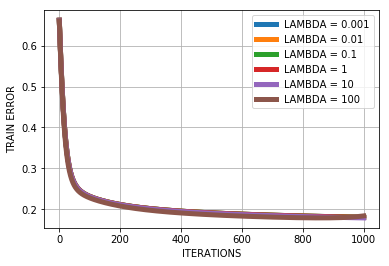

In [668]:
pyplot.plot(train_error_001_l2,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(train_error_01_l2,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(train_error_0p1_l2,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(train_error_1_l2,label="LAMBDA = 1",linewidth=5)
pyplot.plot(train_error_10_l2,label="LAMBDA = 10",linewidth=5)
pyplot.plot(train_error_100_l2,label="LAMBDA = 100",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("TRAIN ERROR")
pyplot.legend()
pyplot.grid()
pyplot.show()

## CV ERROR v/s ITERATIONS WITH L2 REGULARIZATION WITH VARIOUS LAMBDA'S

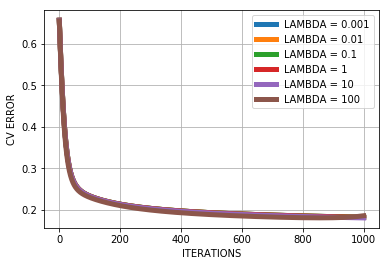

In [669]:
pyplot.plot(cv_error_001_l2,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(cv_error_01_l2,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(cv_error_0p1_l2,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(cv_error_1_l2,label="LAMBDA = 1",linewidth=5)
pyplot.plot(cv_error_10_l2,label="LAMBDA = 10",linewidth=5)
pyplot.plot(cv_error_100_l2,label="LAMBDA = 100",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("CV ERROR")
pyplot.legend()
pyplot.grid()
pyplot.show()

## CV ERROR v/s ITERATIONS WITH L2 REGULARIZATION WITH VARIOUS LAMBDA'S

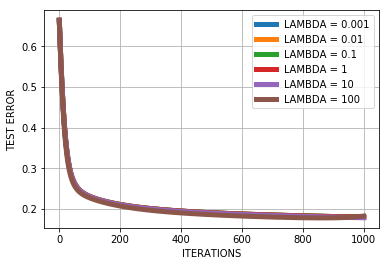

In [670]:
pyplot.plot(test_error_001_l2,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(test_error_01_l2,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(test_error_0p1_l2,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(test_error_1_l2,label="LAMBDA = 1",linewidth=5)
pyplot.plot(test_error_10_l2,label="LAMBDA = 10",linewidth=5)
pyplot.plot(test_error_100_l2,label="LAMBDA = 100",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("TEST ERROR")
pyplot.legend()
pyplot.grid()
pyplot.show()

## TRAIN ACCURACY v/s ITERATIONS WITH L2 REGULARIZATION WITH VARIOUS LAMBDA'S

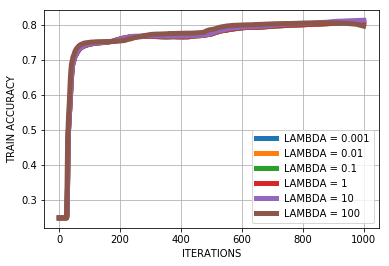

In [671]:
pyplot.plot(train_acc_001_l2,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(train_acc_01_l2,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(train_acc_0p1_l2,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(train_acc_1_l2,label="LAMBDA = 1",linewidth=5)
pyplot.plot(train_acc_10_l2,label="LAMBDA = 10",linewidth=5)
pyplot.plot(train_acc_100_l2,label="LAMBDA = 100",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("TRAIN ACCURACY")
pyplot.legend()
pyplot.grid()
pyplot.show()

## CV ACCURACY v/s ITERATIONS WITH L2 REGULARIZATION WITH VARIOUS LAMBDA'S

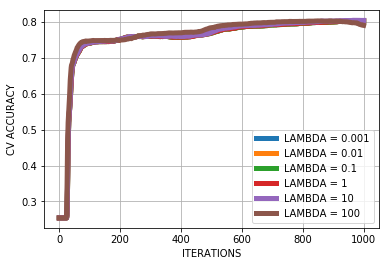

In [672]:
pyplot.plot(cv_acc_001_l2,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(cv_acc_01_l2,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(cv_acc_0p1_l2,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(cv_acc_1_l2,label="LAMBDA = 1",linewidth=5)
pyplot.plot(cv_acc_10_l2,label="LAMBDA = 10",linewidth=5)
pyplot.plot(cv_acc_100_l2,label="LAMBDA = 100",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("CV ACCURACY")
pyplot.legend()
pyplot.grid()
pyplot.show()

## TEST ACCURACY v/s ITERATIONS WITH L2 REGULARIZATION WITH VARIOUS LAMBDA'S

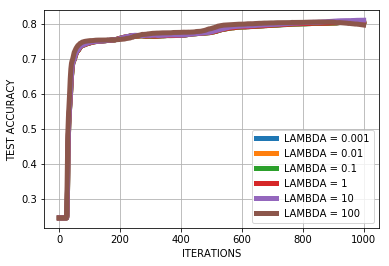

In [673]:
pyplot.plot(test_acc_001_l2,label="LAMBDA = 0.001",linewidth=5)
pyplot.plot(test_acc_01_l2,label="LAMBDA = 0.01",linewidth=5)
pyplot.plot(test_acc_0p1_l2,label="LAMBDA = 0.1",linewidth=5)
pyplot.plot(test_acc_1_l2,label="LAMBDA = 1",linewidth=5)
pyplot.plot(test_acc_10_l2,label="LAMBDA = 10",linewidth=5)
pyplot.plot(test_acc_100_l2,label="LAMBDA = 100",linewidth=5)
pyplot.xlabel("ITERATIONS")
pyplot.ylabel("TEST ACCURACY")
pyplot.legend()
pyplot.grid()
pyplot.show()

# BEST LAMBDA FOR L2 REGULARIZATION IS “10”  WITH TEST ACCURACY OF 81.01% AND TEST ERROR OF 0.178"